In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-drug-name-detection-dataset/data.yaml
/kaggle/input/the-drug-name-detection-dataset/valid/labels/Piroxicam_jpeg.rf.92f5911aeea26a8843b56ed2ed9781a3.txt
/kaggle/input/the-drug-name-detection-dataset/valid/labels/esomeprazole_jpg.rf.f6c27e5652ac49a23f00d97bda9f21de.txt
/kaggle/input/the-drug-name-detection-dataset/valid/labels/MTA-37901215_brd-44261_celestamin-botol-sirup-60ml-kya-healthcare_full01_jpg.rf.5de662a57db4ae99b571e571c040b21d.txt
/kaggle/input/the-drug-name-detection-dataset/valid/labels/escitalopram_jpg.rf.1a470a97d3ffbbcb74ec30d0bbc33dc7.txt
/kaggle/input/the-drug-name-detection-dataset/valid/labels/calcium-carbonate-vitamin-d3_jpeg.rf.777974f06593a690508b62e16323ec29.txt
/kaggle/input/the-drug-name-detection-dataset/valid/labels/IMG-20230813-WA0017_jpg.rf.64faf69c825141a0f1194989013c9b7c.txt
/kaggle/input/the-drug-name-detection-dataset/valid/labels/8HpaXWQCdLKoQxyFTtwklzgAIIx_jpg.rf.a3eaabdfd8857acb5f43f33273821d91.txt
/kaggle/input/the-drug-name-detecti

In [2]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 22.0 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
model = YOLO('yolov8n.pt')


100%|██████████| 6.25M/6.25M [00:00<00:00, 91.8MB/s]


In [5]:
history=model.train(data='/kaggle/input/the-drug-name-detection-dataset/data.yaml',
           imgsz=640,epochs=50,batch=32,name='yolov8n_v1')

Ultralytics 8.3.91 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/the-drug-name-detection-dataset/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_v1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

100%|██████████| 755k/755k [00:00<00:00, 6.18MB/s]
2025-03-17 18:04:11,506	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-03-17 18:04:12,070	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 111MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/the-drug-name-detection-dataset/train/labels... 1276 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1276/1276 [00:03<00:00, 341.19it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/the-drug-name-detection-dataset/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 182, len(boxes) = 1277. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/the-drug-name-detection-dataset/valid/labels... 365 images, 2 backgrounds, 0 corrupt: 100%|██████████| 365/365 [00:01<00:00, 292.18it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/the-drug-name-detection-dataset/valid is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 44, len(boxes) = 364. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Plotting labels to runs/detect/yolov8n_v1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8n_v1
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.84G      1.894      3.698      1.642         47        640: 100%|██████████| 40/40 [00:15<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.57it/s]

                   all        365        364      0.194      0.102     0.0745     0.0252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.77G      1.707      2.904      1.549         49        640: 100%|██████████| 40/40 [00:13<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.41it/s]

                   all        365        364      0.142      0.203     0.0737     0.0264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.77G      1.695      2.562      1.567         48        640: 100%|██████████| 40/40 [00:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]

                   all        365        364     0.0523     0.0879     0.0266    0.00915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.77G      1.758      2.399       1.61         48        640: 100%|██████████| 40/40 [00:13<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.59it/s]

                   all        365        364      0.244       0.25      0.146      0.051



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.77G       1.69      2.188      1.565         45        640: 100%|██████████| 40/40 [00:14<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.49it/s]

                   all        365        364      0.247      0.297       0.18     0.0768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.77G      1.646       2.14      1.529         39        640: 100%|██████████| 40/40 [00:13<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.54it/s]

                   all        365        364      0.249      0.286      0.193     0.0839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.77G      1.636      2.067      1.526         47        640: 100%|██████████| 40/40 [00:13<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.59it/s]

                   all        365        364      0.286      0.349       0.25       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.77G      1.565      2.043      1.493         45        640: 100%|██████████| 40/40 [00:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.51it/s]

                   all        365        364      0.236       0.31       0.19     0.0903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.77G      1.558       1.97      1.467         36        640: 100%|██████████| 40/40 [00:13<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.54it/s]

                   all        365        364      0.309      0.363       0.26      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.77G      1.562      1.937      1.467         42        640: 100%|██████████| 40/40 [00:12<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.51it/s]

                   all        365        364      0.413      0.434      0.384      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.77G      1.512      1.891       1.41         46        640: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all        365        364      0.388      0.495       0.35      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.77G      1.537      1.876      1.449         45        640: 100%|██████████| 40/40 [00:13<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.51it/s]

                   all        365        364      0.339      0.454      0.358      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.77G      1.488      1.848      1.408         51        640: 100%|██████████| 40/40 [00:13<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        365        364      0.317      0.273      0.204     0.0987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.77G      1.463      1.806      1.383         45        640: 100%|██████████| 40/40 [00:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.52it/s]

                   all        365        364      0.384      0.456      0.375      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.77G      1.457      1.769      1.381         55        640: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.26it/s]

                   all        365        364      0.409        0.5      0.414      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.77G       1.42      1.698      1.365         52        640: 100%|██████████| 40/40 [00:13<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.48it/s]

                   all        365        364      0.505      0.412      0.438      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.77G      1.434      1.726      1.373         45        640: 100%|██████████| 40/40 [00:12<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all        365        364      0.473      0.484      0.455       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.77G      1.431       1.68      1.366         49        640: 100%|██████████| 40/40 [00:13<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.49it/s]

                   all        365        364      0.469      0.536      0.469      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.77G      1.413      1.642      1.352         39        640: 100%|██████████| 40/40 [00:13<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.53it/s]

                   all        365        364      0.404      0.519      0.409      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.77G      1.387      1.645      1.327         48        640: 100%|██████████| 40/40 [00:13<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]

                   all        365        364        0.5      0.498       0.49      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.77G      1.373       1.64      1.312         54        640: 100%|██████████| 40/40 [00:13<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.50it/s]

                   all        365        364      0.473      0.525      0.499      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.77G      1.339      1.563       1.29         35        640: 100%|██████████| 40/40 [00:13<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.56it/s]

                   all        365        364      0.512      0.514      0.473      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.77G      1.353      1.583        1.3         52        640: 100%|██████████| 40/40 [00:13<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.52it/s]

                   all        365        364      0.524      0.533      0.516      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.77G      1.369      1.556      1.308         43        640: 100%|██████████| 40/40 [00:13<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.53it/s]

                   all        365        364      0.527      0.481      0.488      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.77G      1.315      1.527       1.29         41        640: 100%|██████████| 40/40 [00:13<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.49it/s]

                   all        365        364      0.478      0.527      0.512      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.77G      1.361      1.523      1.317         42        640: 100%|██████████| 40/40 [00:13<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.48it/s]

                   all        365        364      0.465      0.494      0.463      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.77G      1.287      1.491      1.261         40        640: 100%|██████████| 40/40 [00:13<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.56it/s]

                   all        365        364      0.485      0.536      0.506      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.77G      1.289      1.449      1.251         51        640: 100%|██████████| 40/40 [00:13<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.50it/s]

                   all        365        364      0.495      0.599      0.559      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.77G      1.285      1.468      1.252         45        640: 100%|██████████| 40/40 [00:12<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.54it/s]

                   all        365        364      0.491      0.593      0.533      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.77G      1.283      1.391      1.245         48        640: 100%|██████████| 40/40 [00:13<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

                   all        365        364      0.526      0.556      0.555      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.77G      1.254      1.396      1.245         43        640: 100%|██████████| 40/40 [00:13<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.48it/s]

                   all        365        364      0.604       0.53      0.582      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.77G      1.271      1.413      1.236         43        640: 100%|██████████| 40/40 [00:13<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.50it/s]

                   all        365        364      0.606      0.574      0.617       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.77G      1.261      1.388      1.233         47        640: 100%|██████████| 40/40 [00:13<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.46it/s]

                   all        365        364      0.622      0.527      0.572      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.77G      1.247      1.395      1.225         56        640: 100%|██████████| 40/40 [00:13<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.55it/s]

                   all        365        364        0.6       0.63      0.589      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.77G      1.247      1.333      1.228         47        640: 100%|██████████| 40/40 [00:13<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.53it/s]

                   all        365        364      0.611      0.579      0.614      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.77G      1.211      1.299       1.21         45        640: 100%|██████████| 40/40 [00:13<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]

                   all        365        364      0.624      0.607      0.633      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.77G      1.235      1.336       1.22         52        640: 100%|██████████| 40/40 [00:12<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.52it/s]

                   all        365        364      0.594      0.629       0.62      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.77G      1.185      1.321      1.196         46        640: 100%|██████████| 40/40 [00:13<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.50it/s]

                   all        365        364      0.651      0.591      0.631      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.77G      1.173      1.246      1.189         43        640: 100%|██████████| 40/40 [00:12<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.59it/s]

                   all        365        364      0.635      0.651      0.637      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.77G      1.202       1.28      1.197         58        640: 100%|██████████| 40/40 [00:13<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.53it/s]

                   all        365        364      0.567      0.662      0.619      0.379


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.77G      1.119      1.209      1.175         28        640: 100%|██████████| 40/40 [00:14<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.58it/s]

                   all        365        364      0.554      0.676       0.64      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.77G      1.127      1.147      1.157         27        640: 100%|██████████| 40/40 [00:12<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.61it/s]

                   all        365        364      0.601      0.629      0.647      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.77G      1.094      1.129      1.151         28        640: 100%|██████████| 40/40 [00:12<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.50it/s]

                   all        365        364      0.659      0.646      0.674      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.77G      1.069      1.077      1.126         28        640: 100%|██████████| 40/40 [00:12<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.66it/s]

                   all        365        364      0.601      0.657      0.665      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.77G      1.078      1.063      1.143         29        640: 100%|██████████| 40/40 [00:12<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.64it/s]

                   all        365        364      0.695      0.615      0.693      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.77G      1.051      1.042      1.118         27        640: 100%|██████████| 40/40 [00:12<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.55it/s]

                   all        365        364       0.67      0.612      0.681      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.77G      1.036      1.025      1.106         28        640: 100%|██████████| 40/40 [00:12<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.60it/s]

                   all        365        364      0.604      0.671      0.681      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.77G      1.025      1.011      1.119         28        640: 100%|██████████| 40/40 [00:12<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.61it/s]

                   all        365        364      0.674       0.62      0.682      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.77G      1.015     0.9812      1.094         29        640: 100%|██████████| 40/40 [00:12<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.60it/s]

                   all        365        364       0.67      0.618      0.689      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.77G     0.9937     0.9651      1.093         28        640: 100%|██████████| 40/40 [00:12<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.51it/s]

                   all        365        364      0.698      0.651      0.707      0.442



50 epochs completed in 0.222 hours.
Optimizer stripped from runs/detect/yolov8n_v1/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/yolov8n_v1/weights/best.pt, 6.3MB

Validating runs/detect/yolov8n_v1/weights/best.pt...
Ultralytics 8.3.91 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.61it/s]


                   all        365        364      0.698      0.651      0.707      0.443
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/yolov8n_v1


In [6]:
metrics=model.val()


Ultralytics 8.3.91 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/the-drug-name-detection-dataset/valid/labels... 365 images, 2 backgrounds, 0 corrupt: 100%|██████████| 365/365 [00:00<00:00, 567.37it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/the-drug-name-detection-dataset/valid is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 44, len(boxes) = 364. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.65it/s]


                   all        365        364      0.697      0.651      0.707      0.442
Speed: 1.8ms preprocess, 4.3ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/yolov8n_v12


In [7]:
metrics.box.map50


0.7073104311104479

In [8]:
!yolo task=detect mode=predict model='/kaggle/working/runs/detect/yolov8n_v1/weights/best.pt' conf=0.5 source='/kaggle/input/the-drug-name-detection-dataset/test/images' save=True

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Ultralytics 8.3.91 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/182 /kaggle/input/the-drug-name-detection-dataset/test/images/20230812_210244_jpg.rf.a2373a15c967eb6a157295e74fc71f45.jpg: 640x640 (no detections), 8.5ms
image 2/182 /kaggle/input/the-drug-name-detection-dataset/test/images/20230812_210441_jpg.rf.304261eeea390228fdd99f23079290aa.jpg: 640x640 1 drug-name, 7.4ms
image 3/182 /kaggle/input/the-drug-name-detection-dataset/test/images/20230812_213537_jpg.rf.ca0e0d0d8c6190258312e46cca65d229.jpg: 640x640 (no detections), 7.4ms
image 4/182 /kaggle/input/the-drug-name-detection-dataset/test/images/20230812_214043_jpg.rf.0df6b253cf09bd47d9ffd72f8158b5d6.jpg: 640x640 (no detections), 7.3ms
image 5/182 /kaggle/input/the-drug-name-detection-dataset/test/images/20230812_215836_jpg.rf.c9608220426c128e75c907d143f77f9a.jpg: 640x640 (no detections), 7.3ms
image 6/182 /kaggle/input/the-drug-na

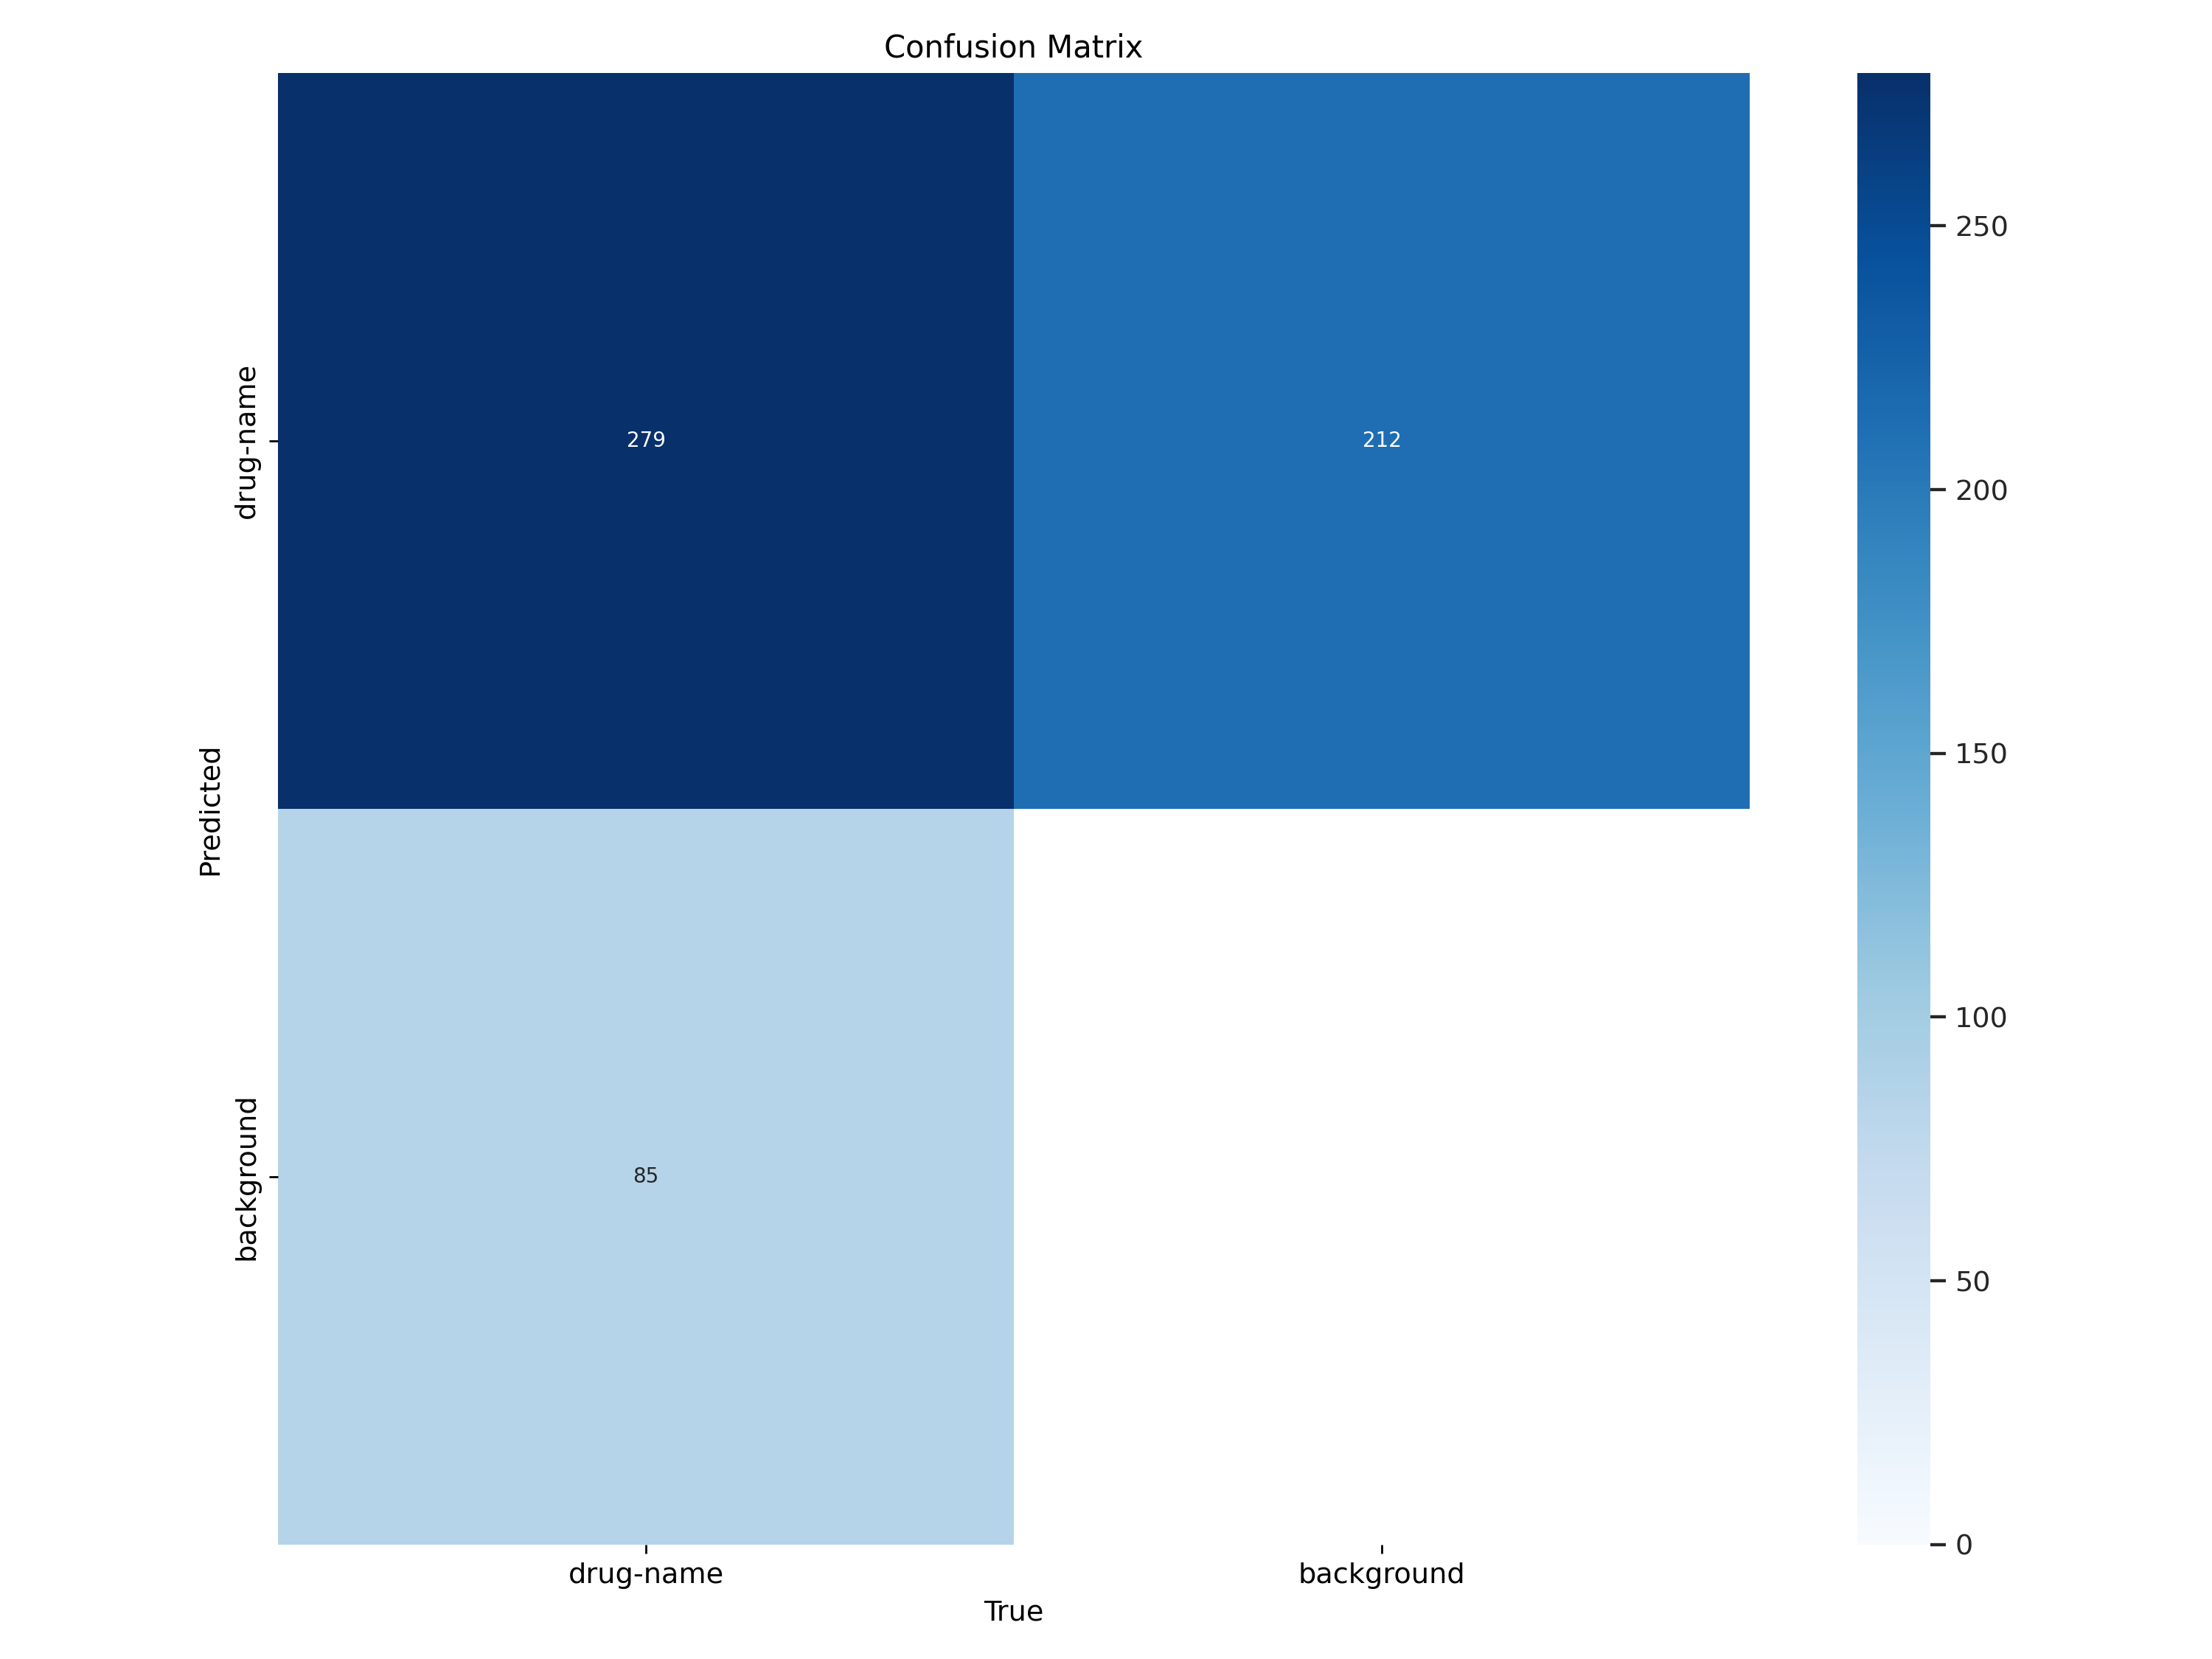

In [9]:
from IPython.display import display, Image
Image(filename='/kaggle/working/runs/detect/yolov8n_v1/confusion_matrix.png',width=800,height=500)


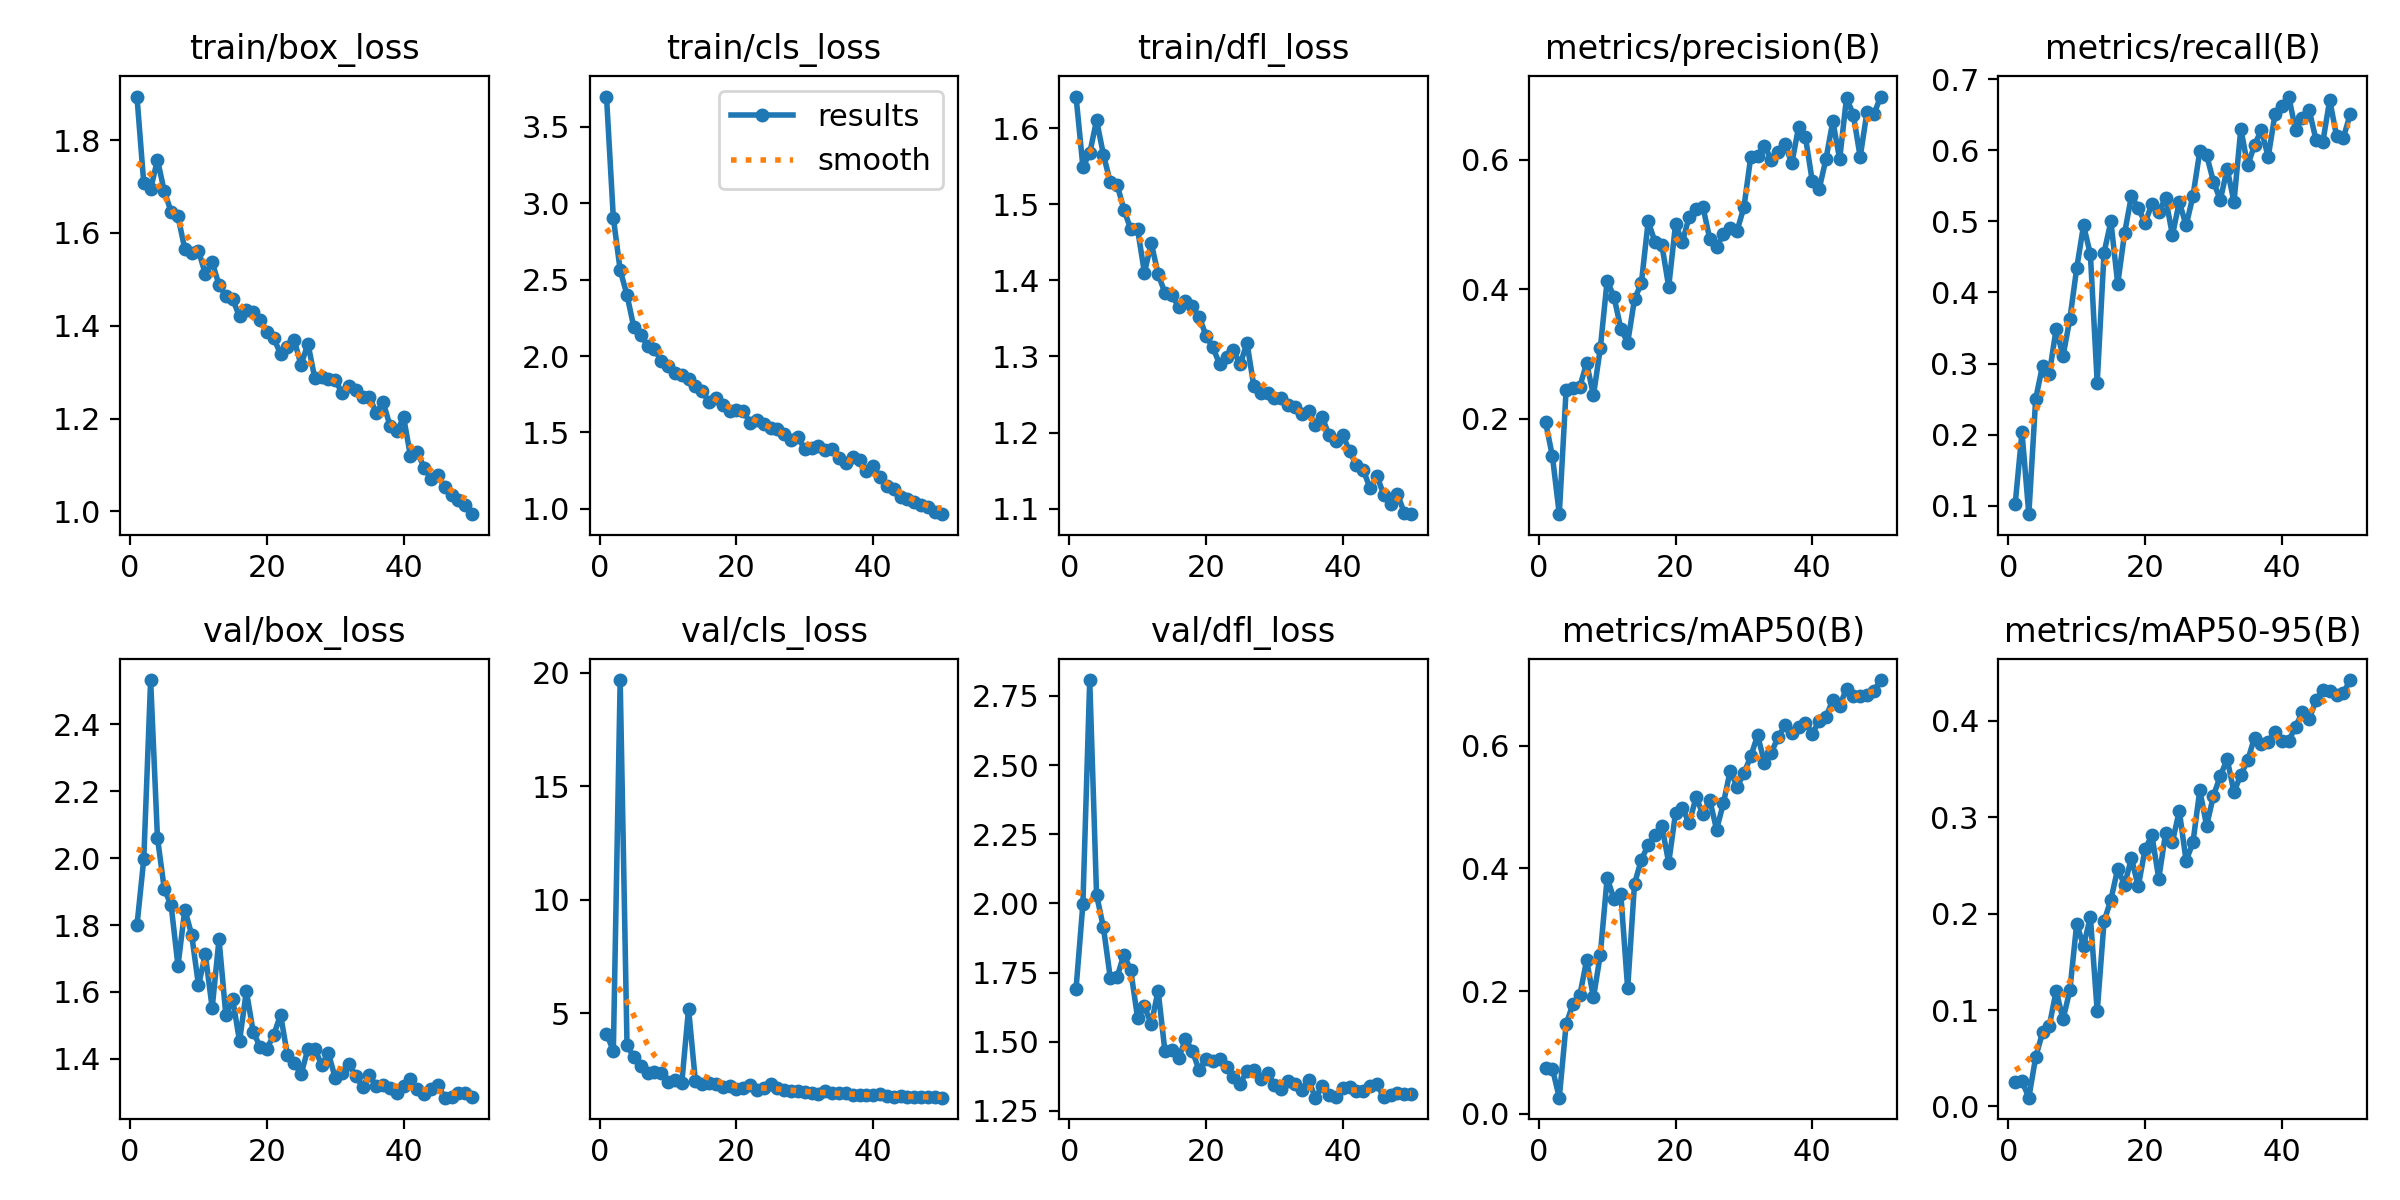

In [10]:
Image(filename='/kaggle/working/runs/detect/yolov8n_v1/results.png')

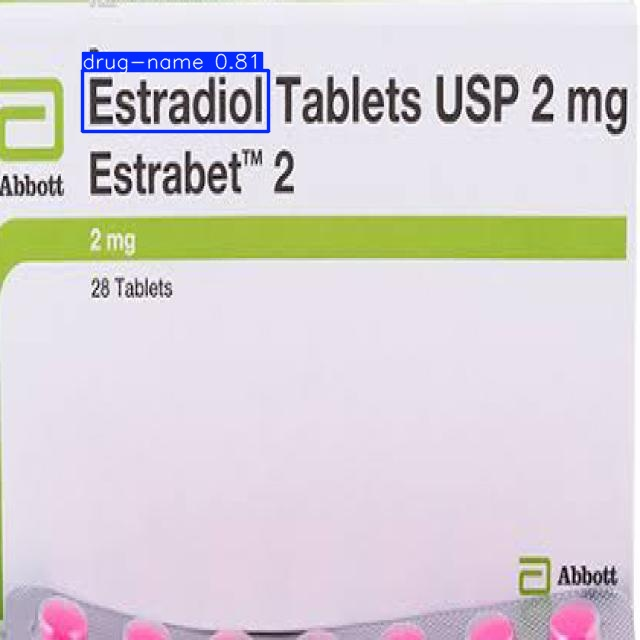

In [11]:
Image(filename='/kaggle/working/runs/detect/predict/Estradiol_jpeg.rf.c02d2810fb9cee66bcd967f55115ccf4.jpg')

In [12]:
!pip install pytesseract opencv-python pillow


0: 640x640 1 drug-name, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)
Detected Drug Names:
Nebivolol HCI


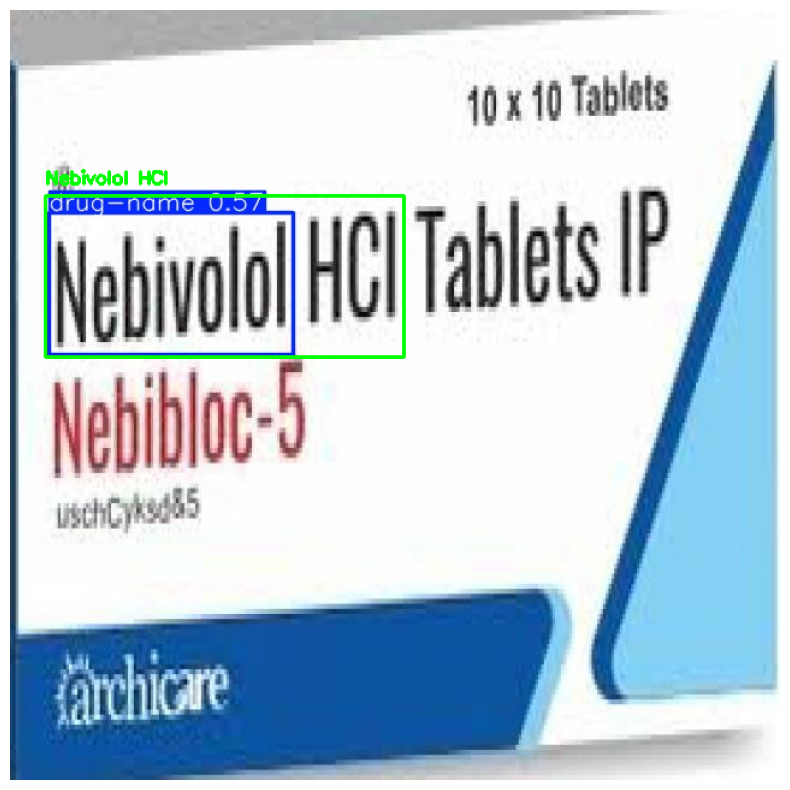

In [13]:
import cv2
import numpy as np
from ultralytics import YOLO
import pytesseract
import matplotlib.pyplot as plt

# Set the path to the Tesseract executable (adjust for your OS)
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'  # Default location for Tesseract on Linux

# Load the YOLOv8 model from the .pt file
model = YOLO("/kaggle/working/runs/detect/yolov8n_v1/weights/best.pt")

# Load the image
img = cv2.imread("/kaggle/working/runs/detect/predict/Nebivolol_jpeg.rf.e13659c0acee5e7c7ee05e2db850dc10.jpg")

# Perform inference
results = model(img)

# Initialize a list to store detected drug names
detected_drug_names = []

# Draw the bounding boxes and extract the detected text using OCR
for result in results:
    # Get the bounding boxes, classes, and scores
    boxes = result.boxes
    for box in boxes:
        # Get the bounding box coordinates
        x1, y1, x2, y2 = box.xyxy[0]  # (x1, y1, x2, y2)
        confidence = box.conf[0]  # Confidence score
        class_id = int(box.cls[0])  # Class ID

        # Filter out weak predictions
        if confidence > 0.5:
            # Draw the bounding box on the image
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

            # Extract the region of interest (ROI)
            roi = img[int(y1):int(y2), int(x1):int(x2)]

            # Use Tesseract to perform OCR on the ROI
            text = pytesseract.image_to_string(roi)

            # Append the detected text (drug name) to the list
            detected_drug_names.append(text.strip())  # Remove any leading/trailing whitespace

            # Write the detected text above the bounding box
            cv2.putText(img, text.strip(), (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Print the detected drug names
print("Detected Drug Names:")
for name in detected_drug_names:
    print(name)

# Convert BGR image to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes and recognized text using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


medicine_name

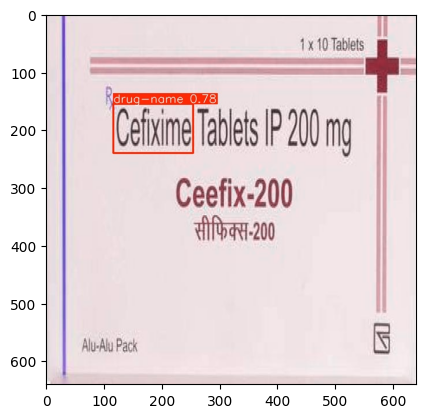

In [14]:

image = cv2.imread("/kaggle/working/runs/detect/predict/cefixime_jpeg.rf.c9f9362c80b7196226baf509449eef2f.jpg")
plt.imshow(image)

In [15]:
import requests

def get_drug_composition(drug_name, api_key):
    base_url = "https://api.drugbank.com/v1"
    
    # Search for the drug by name
    search_url = f"{base_url}/drugs?name={drug_name}"
    headers = {
        "Authorization": f"Bearer {api_key}"
    }
    
    # Make the request to search for the drug
    response = requests.get(search_url, headers=headers)
    
    if response.status_code != 200:
        print(f"Error fetching data: {response.status_code} - {response.text}")
        return None

    # Parse the search results
    drugs = response.json().get('data', [])
    
    if not drugs:
        print(f"No drug found for name: {drug_name}")
        return None
    
    # Get the first drug found (you can modify this for multiple drugs)
    drug_info = drugs[0]
    drug_id = drug_info['id']
    
    # Fetch detailed information for the drug
    detail_url = f"{base_url}/drugs/{drug_id}"
    detail_response = requests.get(detail_url, headers=headers)
    
    if detail_response.status_code != 200:
        print(f"Error fetching drug details: {detail_response.status_code} - {detail_response.text}")
        return None
    
    # Parse and return the composition
    details = detail_response.json()
    composition = details.get('drugs', {}).get('structure', {})
    
    return {
        "name": details.get('name'),
        "composition": composition
    }

# Example usage
api_key = "YOUR_API_KEY"  # Replace with your actual API key
drug_name = "Atorvastatin"  # Example drug name
composition_info = get_drug_composition(drug_name, api_key)

if composition_info:
    print(f"Drug Name: {composition_info['name']}")
    print("Composition:", composition_info['composition'])


Error fetching data: 401 - {"error":"Token invalid"}
